In [1]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_csv('fear_greed_index.csv')
df2=pd.read_csv('historical_data.csv')

In [4]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [25]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


### Checking dataframe Info

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
df1.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [9]:
df2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


###There are no null values in both datasets.

In [11]:
df1.duplicated().sum()

np.int64(0)

In [12]:
df2.duplicated().sum()

np.int64(0)

In [13]:
df1.shape

(2644, 4)

In [14]:
df2.shape

(211224, 16)

####fear_greed_index dataset has 2644 rows and 4 columns while historical_data dataset has 211224 rows and 16 columns

## Converting data columns to datetime format

In [16]:
df1['date']=pd.to_datetime(df1['date'])


In [19]:
df2['Timestamp IST']=pd.to_datetime(df2['Timestamp IST'],dayfirst=True, errors='coerce')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [29]:
# Sentiment
df1['date'] = pd.to_datetime(df1['date']).dt.date

# Trader data (from Unix timestamp)
df2['date'] = pd.to_datetime(df2['Timestamp IST'], unit='s').dt.date


In [30]:
data=df2.merge(df1,on='date',how='left')

In [31]:
data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [37]:
data['date']=pd.to_datetime(data['date'])

In [38]:
data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [40]:
data.groupby('classification')['Closed PnL'].mean()

,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


### Trader profitability is highest during Extreme Greed periods, followed by Fear phases. Neutral markets show the lowest returns, suggesting that emotionally charged markets provide stronger price movements and trading opportunities.

In [42]:
data.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


###Traders increase exposure during Fear periods (avg size ≈ 7.8k USD), suggesting reactive risk-taking. However, profitability peaks during Extreme Greed despite lower position sizes (~3.1k USD), indicating that strong market trends — not leverage — drive returns.

In [46]:
data['win'] = data['Closed PnL'] > 0


In [50]:
data.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification,win
85167,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,HYPE,19.830000,11.0000,218.13,SELL,2024-12-14 07:27:00,1225.740000,Close Long,1.089000,...,55317015570,False,0.010906,5.870000e+14,1.730000e+12,2024-12-14,1.734154e+09,83.0,Extreme Greed,True
105922,0x8477e447846c758f5a675856001ea72298fd9cb5,GALA,0.039319,280.0000,11.01,SELL,2025-01-03 13:31:00,-9092.000000,Open Short,0.000000,...,60374699429,True,0.003853,3.780000e+14,1.740000e+12,2025-01-03,1.735882e+09,74.0,Greed,False
52095,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,14.059000,1.4700,20.67,SELL,2025-03-12 07:28:00,3284.570000,Close Long,0.504651,...,79214847698,True,0.007233,7.120000e+14,1.740000e+12,2025-03-12,1.741757e+09,34.0,Fear,True
21985,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,2922.400000,8.3912,24522.44,BUY,2024-05-10 21:14:00,-13.392100,Close Short,846.923816,...,22122538498,True,8.582855,9.490000e+13,1.720000e+12,2024-05-10,1.715319e+09,66.0,Greed,True
58729,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,18.433000,5.3900,99.35,SELL,2025-04-21 14:24:00,1361.655887,Sell,3.932944,...,87758243819,True,0.034773,4.260000e+14,1.750000e+12,2025-04-21,1.745213e+09,39.0,Fear,True


In [51]:
data.groupby('classification')['win'].mean()

,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


##Insight 1 — Profitability peaks in Extreme Greed

Traders achieve the highest average PnL and win rate when sentiment is extremely greedy. Despite lower position sizes, market trends appear to favor directional trading.



## Insight 2 — Traders over-risk during Fear

Average trade size is highest in Fear conditions, but profitability and win rate do not improve proportionally. This suggests emotional overexposure during uncertainty.

## Insight 3 — Accuracy drops in Extreme Fear

Win rate is lowest in Extreme Fear, indicating panic-driven decision making and poor trade timing.

<Axes: xlabel='classification', ylabel='Closed PnL'>

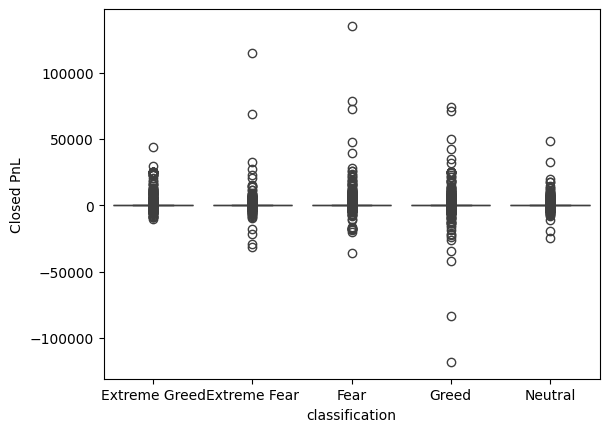

In [53]:
import seaborn as sns
sns.boxplot(x='classification', y='Closed PnL', data=data)


In [54]:
data['risk_segment'] = pd.qcut(data['Size USD'], 2, labels=['Low Risk','High Risk'])


In [55]:
data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification,win,risk_segment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,False,High Risk
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,False,Low Risk
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,False,High Risk
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,False,High Risk
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,False,Low Risk


In [58]:
data.groupby(['risk_segment','classification'])['Closed PnL'].mean()


/tmp/ipython-input-2415986490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['risk_segment','classification'])['Closed PnL'].mean()


risk_segment  classification
Low Risk      Extreme Fear        1.157202
              Extreme Greed       9.628661
              Fear                3.580906
              Greed               3.609685
              Neutral             2.188668
High Risk     Extreme Fear       61.196379
              Extreme Greed     140.570044
              Fear               97.025581
              Greed              84.301244
              Neutral            69.581271
Name: Closed PnL, dtype: float64

<Axes: xlabel='classification', ylabel='Closed PnL'>

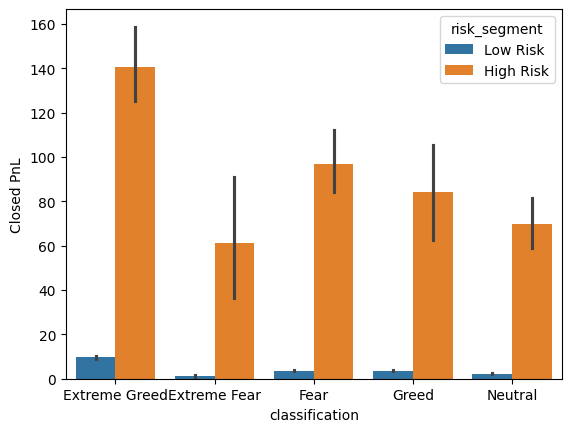

In [59]:
import seaborn as sns
sns.barplot(x='classification', y='Closed PnL', hue='risk_segment', data=data)


### Insight 1 — Risk amplifies sentiment impact

High-risk traders benefit massively in Extreme Greed, but their exposure is also very large in volatile conditions.

###Insight 2 — Low-risk traders are stable but limited

They never lose big, but they also don’t capture large market moves.

###Extreme Greed favors aggressive traders most

The performance jump from Neutral → Extreme Greed is huge for high-risk traders.

This means:

Strong trending markets reward aggressive positioning.

##Rule 1 — Risk-adjust by sentiment

Increase exposure only during Extreme Greed conditions; reduce leverage during Fear regimes to avoid amplified losses.

##Rule 2 — Different rules for different traders

Conservative traders should maintain steady size across regimes, while aggressive traders should scale risk dynamically with sentiment.

In [64]:
daily = data.groupby(['Account','date','classification']).agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'win':'mean',
    'Direction':'count'
}).reset_index()

daily.rename(columns={'direction':'trades'}, inplace=True)


In [65]:
daily.head()

,Account,date,classification,Closed PnL,Size USD,win,Direction
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,5089.718249,0.000000,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,7976.664412,0.000000,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,23734.500000,0.000000,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,28186.666667,0.000000,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,17248.148148,0.444444,27


In [67]:
daily['target'] = (daily['Closed PnL'] > 0).astype(int)


In [68]:
daily.head()

,Account,date,classification,Closed PnL,Size USD,win,Direction,target
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,5089.718249,0.000000,177,0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,7976.664412,0.000000,68,0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,23734.500000,0.000000,40,0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,28186.666667,0.000000,12,0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,17248.148148,0.444444,27,1


<Axes: xlabel='classification', ylabel='Closed PnL'>

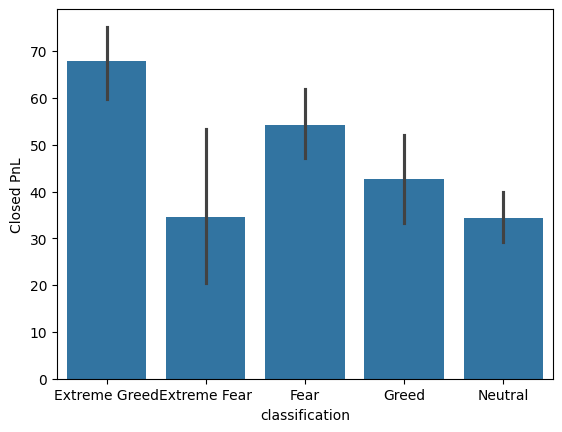

In [82]:
sns.barplot(x='classification', y='Closed PnL', data=data)

<Axes: xlabel='classification', ylabel='Size USD'>

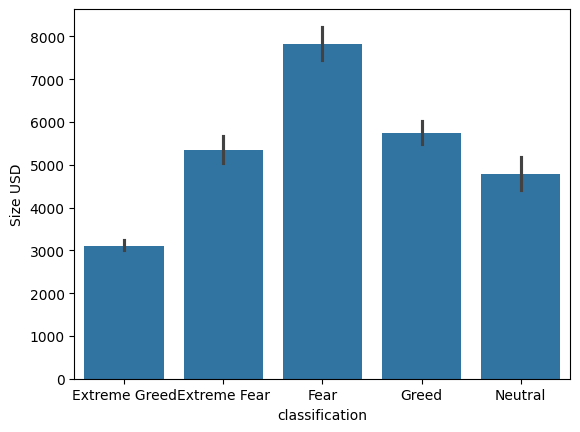

In [83]:
sns.barplot(x='classification', y='Size USD', data=data)


<Axes: xlabel='classification', ylabel='win'>

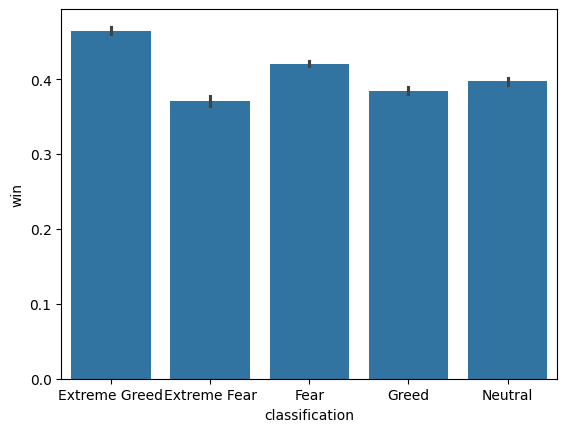

In [84]:
sns.barplot(x='classification', y='win', data=data)


<Axes: xlabel='classification', ylabel='Closed PnL'>

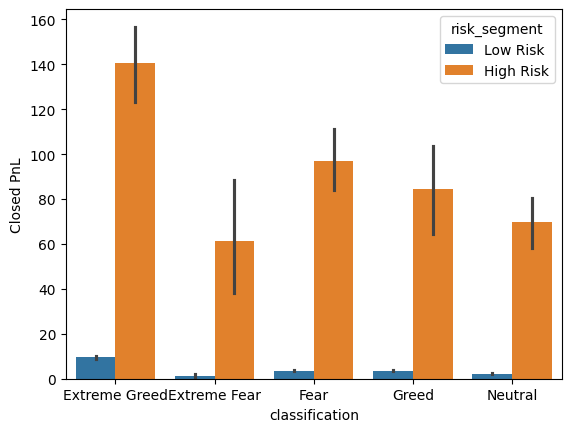

In [85]:
sns.barplot(x='classification', y='Closed PnL', hue='risk_segment', data=data)


In [71]:
X = daily[['Size USD','win','Direction','classification']]
y = daily['target']


In [75]:
from sklearn.model_selection import train_test_split



In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['classification']
numeric = ['Size USD','win','Direction']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical),
        ('num', 'passthrough', numeric)
    ])


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier())
])

model.fit(X_train, y_train)
pred = model.predict(X_test)


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       187
           1       0.93      0.99      0.96       281

    accuracy                           0.95       468
   macro avg       0.96      0.94      0.95       468
weighted avg       0.96      0.95      0.95       468



In [86]:
import joblib

joblib.dump(model, "trader_model_pipeline.pkl")


['trader_model_pipeline.pkl']

In [87]:
import sklearn
sklearn.__version__


'1.6.1'

In [88]:
X.columns

Index(['Size USD', 'win', 'Direction', 'classification'], dtype='object')